---
# General patents overview
    Script to have a general analysis of the total Public Google Patents dataset and compare to query uniqueID count before extracting the data to work with
---

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# read unique count of patents
all_patents_unique = pd.read_csv("all-patents-unique.csv")
ai_unique = pd.read_csv("all-ai-unique.csv")

In [16]:
## get columns in the way I need then
all_patents_unique['publication_date'] = pd.to_datetime(all_patents_unique['publication_date'], format='%Y%m%d')
all_patents_unique['term_count'] = pd.to_numeric(all_patents_unique['unique_family_count'])
all_patents_unique['publication_year'] = all_patents_unique['publication_date'].dt.year

ai_unique['publication_date'] = pd.to_datetime(ai_unique['publication_date'], format='%Y%m%d')
ai_unique['term_count'] = pd.to_numeric(ai_unique['unique_family_count'])
ai_unique['publication_year'] = ai_unique['publication_date'].dt.year

In [17]:
# Group by 'publication_year' and calculate the sum of 'term_count' for each year
grouped_all = all_patents_unique.groupby('publication_year')['term_count'].sum().reset_index()
grouped_ai = ai_unique.groupby('publication_year')['term_count'].sum().reset_index()

In [18]:
## nice printing
all_unique_total = all_patents_unique['term_count'].sum()
ai_unique_total = ai_unique['term_count'].sum()
print(f'The total term count is: {all_unique_total}')
print(f'The total term count is: {ai_unique_total}')

The total term count is: 141024111
The total term count is: 313885


In [40]:
# Calculate the proportion of AI patents
merged_df = pd.merge(grouped_all, grouped_ai, on='publication_year', suffixes=('_total', '_ai'))
merged_df['proportion'] = merged_df['term_count_ai'] / merged_df['term_count_total']
merged_df['proportion%'] = merged_df['proportion'] * 100

In [45]:
merged_df
merged_df.to_excel('patents-all-ai.xlsx', index=False)

<ipython-input-45-0c64931016ab>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  merged_df.to_excel('patents-all-ai.xlsx', index=False)


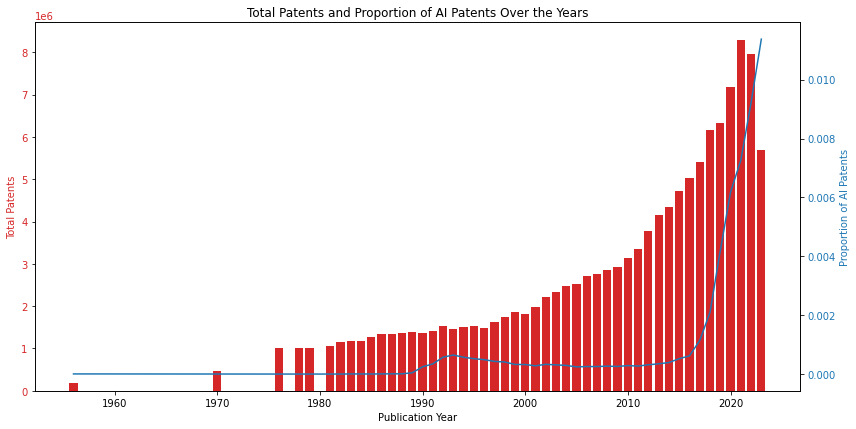

In [36]:
# Plot the simple count and proportion in a bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Publication Year')
ax1.set_ylabel('Total Patents', color=color)
ax1.bar(merged_df['publication_year'], merged_df['term_count_total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Proportion of AI Patents', color=color)
ax2.plot(merged_df['publication_year'], merged_df['proportion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # ensure the two axes are not too close together
plt.title('Total Patents and Proportion of AI Patents Over the Years')
plt.show()

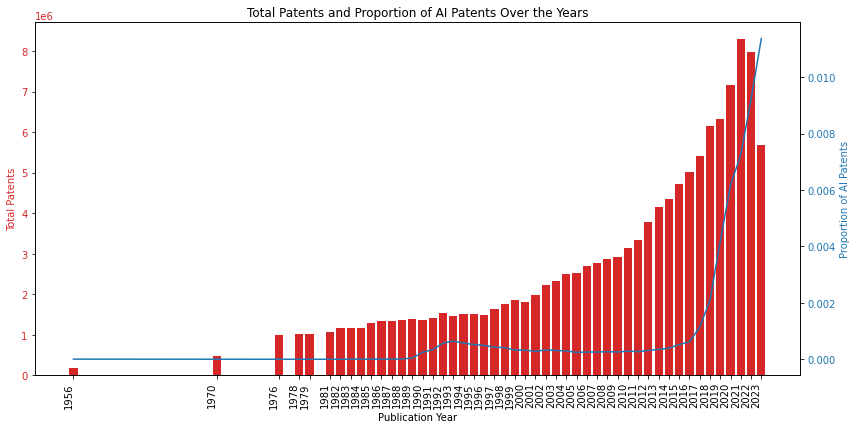

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Make sure to replace this name with your actual DataFrame

# Plot the simple count and proportion in a bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Publication Year')
ax1.set_ylabel('Total Patents', color=color)
ax1.bar(merged_df['publication_year'], merged_df['term_count_total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Proportion of AI Patents', color=color)
ax2.plot(merged_df['publication_year'], merged_df['proportion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks to all unique years
ax1.set_xticks(merged_df['publication_year'])
ax1.set_xticklabels(merged_df['publication_year'], rotation=90, ha='right')

fig.tight_layout()  # ensure the two axes are not too close together
plt.title('Total Patents and Proportion of AI Patents Over the Years')
plt.show()


In [44]:
7968800-8292521

-323721

In [46]:
all_patents_final = pd.read_pickle("patents_all.pkl")

In [47]:
all_patents_final

,publication_number,family_id,title_localized,abstract_localized,publication_date,country_code,filing_date,grant_date
0,US-2014297284-A1,47007095,[{'text': 'Using context information to facili...,[{'text': 'A virtual assistant uses context in...,20141002,US,20140612,0
1,US-11079279-B2,71400764,[{'text': 'Diagnosis method using laser induce...,[{'text': 'Disclosed herein are a diagnostic m...,20210803,US,20200430,20210803
2,US-11096602-B2,61011844,[{'text': 'Methods and systems for characteriz...,[{'text': 'Methods and systems for characteriz...,20210824,US,20170728,20210824
3,US-10853409-B2,62490131,[{'text': 'Systems and methods for image searc...,[{'text': 'The present disclosure relates to a...,20201201,US,20170629,20201201
4,US-11748569-B2,78293308,[{'text': 'System and method for query authori...,"[{'text': 'Systems, methods, and computer-read...",20230905,US,20221220,20230905
...,...,...,...,...,...,...,...,...
337161,WO-0231764-A2,8170085,[{'text': 'Procede d&#39;apprentissage supervi...,[{'text': 'L&#39;invention concerne un procédé...,20020418,WO,20011005,0
337162,WO-2010146199-A3,43356814,[{'text': 'Identification et caractérisation i...,[{'text': 'L&#39;invention concerne l&#39;iden...,20110714,WO,20100618,0
337163,EP-3407265-A4,59361382,[{'text': 'Device and method for executing for...,[],20190904,EP,20160401,0
337164,EP-3788625-A4,68385458,[{'text': 'Method and apparatus for high volta...,[],20220420,EP,20190408,0
